In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
from scipy.io import savemat

In [2]:
def get_data(data_dir):
    OUTCOME_START = 100
    TRIAL_TIME = 200

    s_trial = 0
    t_trial = 8000 #4500
    n_trials = t_trial - s_trial

    performance = np.zeros((n_trials,1))

    for i in range(s_trial, t_trial):
        with open(data_dir + "/" + str(i) + ".json") as json_file:
            data = json.load(json_file)
            idx = i - s_trial

            inpt = np.array(data["trial_data"]["input"])[:2]
            target = np.array(data["trial_data"]["target"])            
            trial_type = "match" if inpt[0] == target[0] else "non-match"
            
            outcome = np.array(data["network_rates"]["r_output"][OUTCOME_START:])
            choice = [1,0] if np.mean(outcome[:,0]) > np.mean(outcome[:,1]) else [0,1]
                
            if np.all(choice == inpt) and trial_type == "match":
                is_correct = 1
            elif np.all(choice != inpt) and trial_type == "non-match":
                is_correct = 1
            else: 
                is_correct = 0
            performance[idx] = is_correct 
            
    return performance


In [3]:
pwd = "/om2/group/halassa/PFCMD-ali-sabrina/seed0_vshuman_thresh15_varblocks2/by_trial"
performance = get_data(pwd)

In [7]:
print(len(performance))

8000


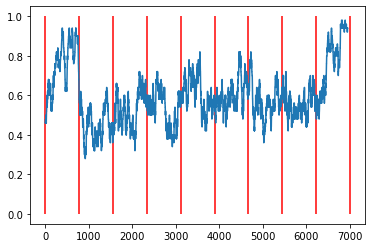

In [4]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

y = [np.mean(performance[i:(i+1)*500]) for i in range(10)]

plt.plot(running_mean(performance, 50))
plt.vlines(np.linspace(0, 4500, num=10), ymin=0, ymax=1, color='r')


In [8]:
savemat("seed0_vshuman_varblocks2.mat", { "performance": performance })